# Setup

## Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import re


# Data Preparation

## Load Data

In [ ]:
pd.set_option('display.max_columns', 50, 'display.width', 200)
df = pd.read_csv('input/Unicorns_Completed.csv')


## Data Cleaning

In [ ]:
def convert_years_months(s):
    m = re.match(r'(\d+)y?\s?(\d+)m?o?', s)
    return f'{m[1]}y{m[2]}m' if m else s

df['Years to Unicorn'] = df['Years to Unicorn'].apply(convert_years_months)


## Prepare data

In [ ]:
df['Unicorn Date'] = pd.to_datetime(df['Unicorn Date'])
df['Valuation ($B)'] = pd.to_numeric(df['Valuation ($B)'])


## Preview data

In [ ]:
df.head()


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Company</th>
      <th>Valuation ($B)</th>
      <th>Total Equity Funding ($)</th>
      <th>Unicorn Date</th>
      <th>Date Founded</th>
      <th>Years to Unicorn</th>
      <th>Industry</th>
      <th>Country</th>
      <th>City</th>
      <th>Select Investors</th>
      <th>Years to Unicorn (Months)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>SpaceX</td>
      <td>350.0</td>
      <td>9000000000</td>
      <td>2012-12-01</td>
      <td>2002</td>
      <td>10y3m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>Hawthorne</td>
      <td>Opus Capital, RRE Ventures, Relay Ventures</td>
      <td>123</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ByteDance</td>
      <td>300.0</td>
      <td>8000000000</td>
      <td>2017-04-07</td>
      <td>2011</td>
      <td>6y3m</td>
      <td>Enterprise Tech</td>
      <td>China</td>
      <td>Beijing</td>
      <td>Breyer Capital, Parkway VC, TIME Ventures</td>
      <td>75</td>
    </tr>
    <tr>
      <th>2</th>
      <td>OpenAI</td>
      <td>157.0</td>
      <td>18000000000</td>
      <td>2019-07-22</td>
      <td>2015</td>
      <td>4y6m</td>
      <td>Industrials</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Dynamo VC, Susa Ventures, Founders Fund</td>
      <td>54</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Ant Group</td>
      <td>150.0</td>
      <td>19000000000</td>
      <td>2017-01-01</td>
      <td>2014</td>
      <td>3y</td>
      <td>Financial Services</td>
      <td>China</td>
      <td>Hangzhou</td>
      <td>Alibaba Group, CPP Investments, The Carlyle Group</td>
      <td>36</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Stripe</td>
      <td>70.0</td>
      <td>9000000000</td>
      <td>2014-01-23</td>
      <td>2009</td>
      <td>5y</td>
      <td>Consumer &amp; Retail</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Sequoia Capital China, ZhenFund, K2 Ventures</td>
      <td>60</td>
    </tr>
  </tbody>
</table>
</div>

# Descriptive Analysis

## Distribution of Valuations across Different Industries

In [ ]:
# Group by industry and sum valuations
industry_valuation_df = df.groupby('Industry')['Valuation ($B)'].sum().reset_index().sort_values('Valuation ($B)', ascending=False)
industry_valuation_df


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Industry</th>
      <th>Valuation ($B)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>Enterprise Tech</td>
      <td>1759.04</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Financial Services</td>
      <td>760.16</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Industrials</td>
      <td>678.55</td>
    </tr>
    <tr>
      <th>0</th>
      <td>Consumer &amp; Retail</td>
      <td>593.30</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Healthcare &amp; Life Sciences</td>
      <td>398.45</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Media &amp; Entertainment</td>
      <td>200.29</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Insurance</td>
      <td>117.06</td>
    </tr>
    <tr>
      <th>8</th>
      <td>West Palm Beach</td>
      <td>3.00</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Health</td>
      <td>1.50</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(industry_valuation_df['Industry'], industry_valuation_df['Valuation ($B)'], color='skyblue')
plt.title('Distribution of Valuations across Different Industries')
plt.xlabel('Total Valuation ($B)')
plt.ylabel('Industry')
plt.grid(axis='x', alpha=0.75)


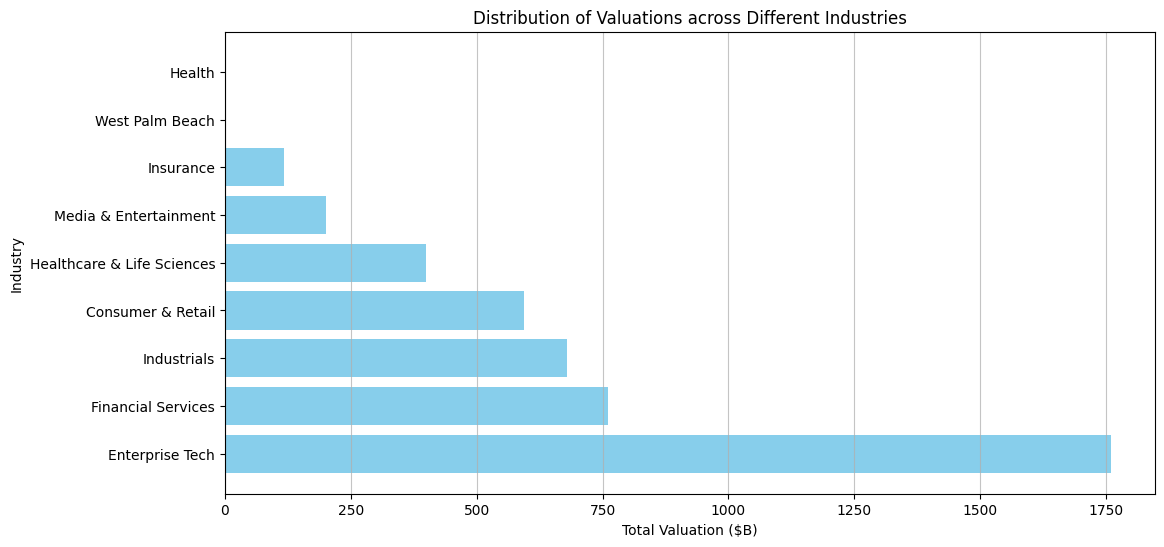

## Distribution of Valuations across Different Countries

In [ ]:
# Group by Country and sum valuations
country_valuation_df = df.groupby('Country')['Valuation ($B)'].sum().reset_index().sort_values('Valuation ($B)', ascending=False).head(20)
country_valuation_df


In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(country_valuation_df['Country'], country_valuation_df['Valuation ($B)'])
plt.title('Distribution of Valuations across Different Countries')
plt.xlabel('Total Valuation ($B)')
plt.ylabel('Countries')
plt.grid(axis='x', alpha=0.75)
plt.show()


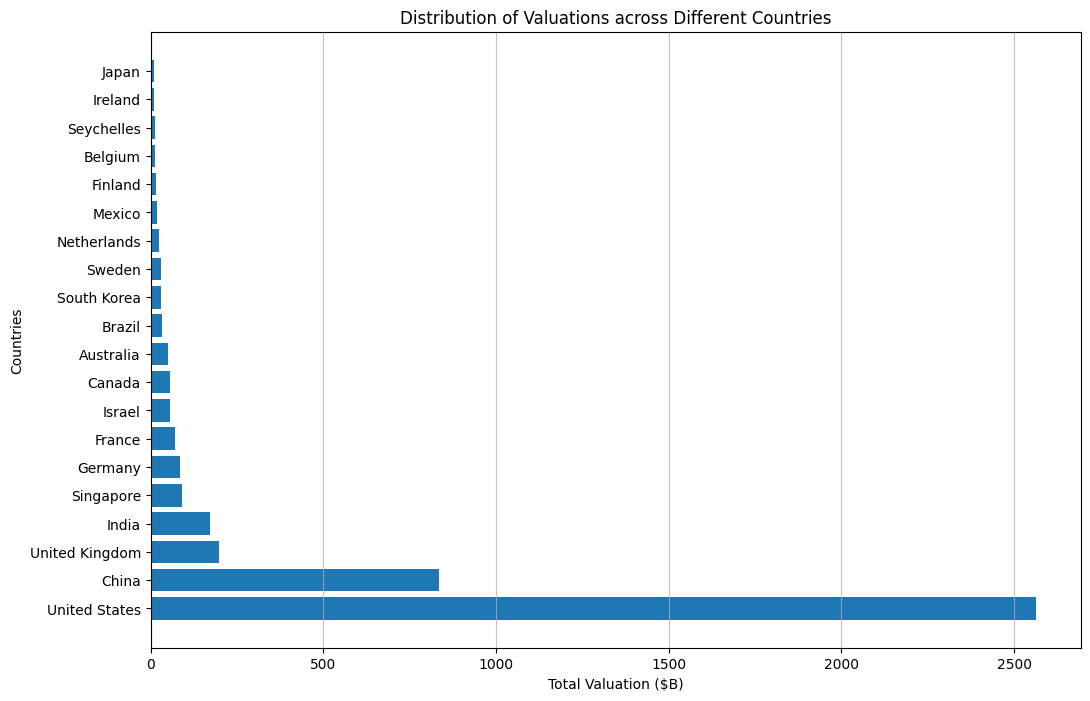

# Time-Based Analysis

## Unicorn Growth Over Time

In [ ]:
unicorn_count = df.groupby(df['Unicorn Date'].dt.year).size()
unicorn_count


``` example
Unicorn Date
2007      1
2011      1
2012      4
2013      4
2014      9
2015     32
2016     17
2017     35
2018     83
2019     85
2020     91
2021    484
2022    252
2023     68
2024     78
dtype: int64
```

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=unicorn_count.index, y=unicorn_count.values, hue=unicorn_count.index, palette='GnBu')
plt.title('Unicorn Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.grid(axis='y', alpha=0.7)
plt.show()


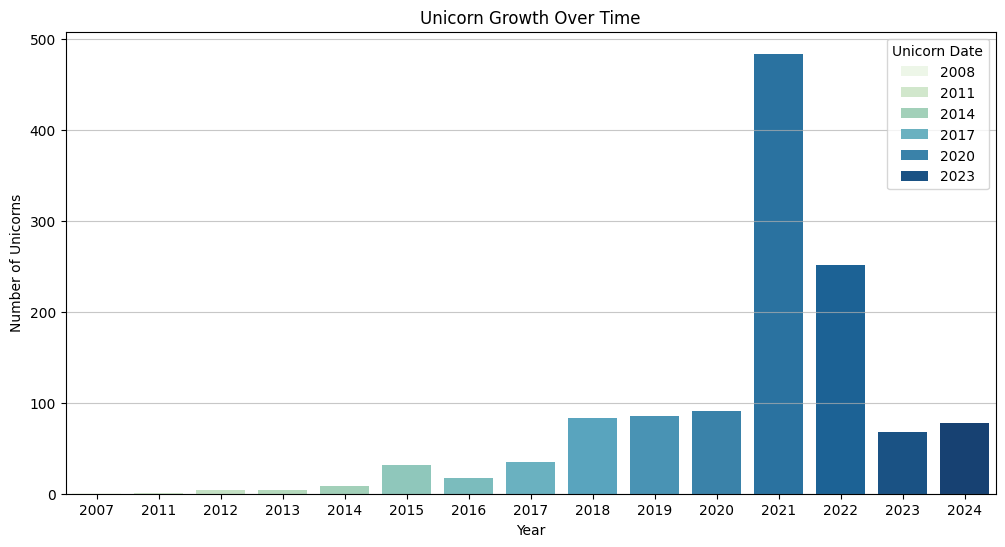

## Years to Unicorn

In [ ]:
# Function to convert "Years to Unicorn" into total months
def convert_years_to_months(years_str):
    if 'y' in years_str and 'm' in years_str:
        years, months = years_str.split('y')
        months = months.replace('m', '').strip()
        return int(years.strip()) * 12 + int(months)
    elif 'y' in years_str:
        years = years_str.replace('y', '').strip()
        return int(years) * 12
    elif 'm' in years_str:
        months = years_str.replace('mo', '').replace('m', '').strip()
        return int(months)
    else:
        return None

df['Years to Unicorn (Months)'] = df['Years to Unicorn'].apply(convert_years_to_months)


In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['Years to Unicorn (Months)'].dropna(), bins=300, color='skyblue')
plt.title('Distribution of Years to Unicorn')
plt.xlabel('Months to Unicorn')
plt.ylabel('Number of Unicorns')
plt.grid(axis='y', alpha=0.75)
plt.show()


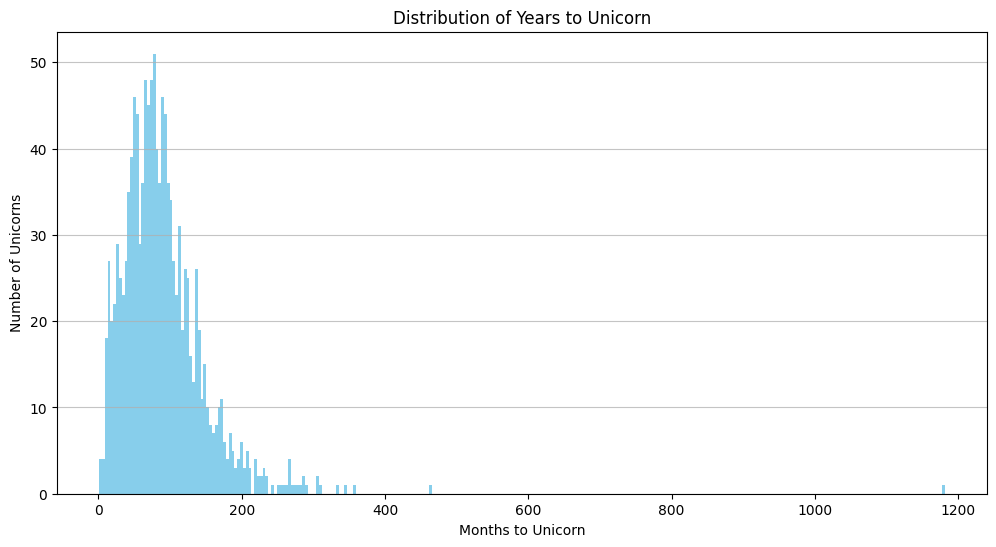